In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the maximum number of columns to display to None
pd.set_option('display.max_columns', None)


## 1. Read the dataset

In [2]:
data = pd.read_csv('KeepaExport-2024-03-22-ProductViewer.csv')
df = data.copy()
df.head()

/tmp/ipykernel_16707/1419418327.py:1: DtypeWarning: Columns (4,5,142,143,144,146,147,148,149,334,335,347,348,390,391,415,416,443,444) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('KeepaExport-2024-03-22-ProductViewer.csv')


,Amazon Trade-In Value: Current,Amazon Trade-In Value: 30 days avg.,Amazon Trade-In Value: 90 days avg.,Amazon Trade-In Value: 180 days avg.,Amazon Trade-In Value: 30 days drop %,Amazon Trade-In Value: 90 days drop %,Amazon Trade-In Value: Price drop since last visit,Amazon Trade-In Value: Drop % since last visit,Amazon Trade-In Value: Last visit,Amazon Trade-In Value: Lowest,...,Is HazMat,Adult Product,Trade-In Eligible,Prime Eligible (Buy Box),Subscribe and Save,One Time Coupon: Absolute,One Time Coupon: Percentage,Subscribe and Save Coupon: Percentage,Amazon Trade-In Value: 1 day drop %,Amazon Trade-In Value: 7 days drop %
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,no,no,no,yes,no,-,-,-,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,no,no,no,no,no,-,-,-,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,no,no,no,no,no,-,-,-,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,no,no,no,no,no,-,-,-,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,no,no,no,yes,no,-,-,-,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8057 entries, 0 to 8056
Columns: 445 entries, Amazon Trade-In Value: Current to Amazon Trade-In Value: 7 days drop %
dtypes: float64(107), int64(2), object(336)
memory usage: 27.4+ MB


Based on the dataset's structure, it has 8057 rows and 445 columns, which includes:

* 107 float64 columns (likely numeric data for prices, sales ranks, percentages, etc.).
* 2 int64 columns (possibly counts or other integers).
* 336 object columns (likely categorical data, text, or dates).

The data occupies 27.4 MB, so it's manageable for Pandas, but preprocessing is crucial to focus on relevant data.

## 2. Clean the data

In [4]:
df = df.replace('-',np.nan)

In [5]:
# There are many columns with emtpy rows and with rows that have few observations. We can remove the columns where data above some threshold value is missing
# Let's set the threshold for missing values
missing_threshold = 0.8
# Calculate the percentage of missing values per column
missing_percent = df.isnull().mean()
# Identify columns where missing values exceed the threshold
columns_to_drop = missing_percent[missing_percent >= missing_threshold].index
len(columns_to_drop)

249

In [6]:
columns_to_drop.tolist()

['Amazon Trade-In Value: Current',
 'Amazon Trade-In Value: 30 days avg.',
 'Amazon Trade-In Value: 90 days avg.',
 'Amazon Trade-In Value: 180 days avg.',
 'Amazon Trade-In Value: 30 days drop %',
 'Amazon Trade-In Value: 90 days drop %',
 'Amazon Trade-In Value: Price drop since last visit',
 'Amazon Trade-In Value: Drop % since last visit',
 'Amazon Trade-In Value: Last visit',
 'Amazon Trade-In Value: Lowest',
 'Amazon Trade-In Value: Highest',
 'Used Offer Count: 30 days drop %',
 'Refurbished Offer Count: 30 days drop %',
 'Collectible Offer Count: 30 days drop %',
 'Number of Pages',
 'Description & Features: Feature 6',
 'Description & Features: Feature 7',
 'Description & Features: Feature 8',
 'Description & Features: Feature 9',
 'Description & Features: Feature 10',
 'Amazon: Current',
 'Amazon: 30 days avg.',
 'Amazon: 90 days avg.',
 'Amazon: 180 days avg.',
 'Amazon: 1 day drop %',
 'Amazon: 7 days drop %',
 'Amazon: 30 days drop %',
 'Amazon: 90 days drop %',
 'Amazon: 

In [7]:
# Drop these columns
df = df.drop(columns=columns_to_drop)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8057 entries, 0 to 8056
Columns: 196 entries, Reviews: Review Count - 30 days drop % to Subscribe and Save
dtypes: float64(50), int64(2), object(144)
memory usage: 12.0+ MB


In [9]:
# Let's clean columns containing '$' as it will be read as a string that we do not  need
columns_with_dollar = df.columns[df.apply(lambda col: col.astype(str).str.contains(r'\$\s*\d+(?:\.\d{1,2})?', na=False).any())]
columns_with_dollar

Index(['Title', 'Description & Features: Description',
       'Description & Features: Feature 1',
       'Description & Features: Feature 2',
       'Description & Features: Feature 3',
       'Description & Features: Feature 4',
       'Description & Features: Feature 5', 'Amazon: Lowest',
       'Amazon: Highest', 'New: Current', 'New: 30 days avg.',
       'New: 90 days avg.', 'New: 180 days avg.',
       'New: Price drop since last visit', 'New: Last visit', 'New: Lowest',
       'New: Highest', 'New, 3rd Party FBA: Current',
       'New, 3rd Party FBA: 30 days avg.', 'New, 3rd Party FBA: 90 days avg.',
       'New, 3rd Party FBA: 180 days avg.', 'New, 3rd Party FBA: Last visit',
       'New, 3rd Party FBA: Lowest', 'New, 3rd Party FBA: Highest',
       'FBA Pick&Pack Fee', 'Referral Fee based on current Buy Box price',
       'New, 3rd Party FBM 🚚: Current', 'New, 3rd Party FBM 🚚: 30 days avg.',
       'New, 3rd Party FBM 🚚: 90 days avg.',
       'New, 3rd Party FBM 🚚: 180 days a

In [10]:
# Select only columns that are numeric and does not contain strings
# It starts with 'Amazon: Lowest' and ends with 'Competitive Price Threshold':
columns_with_dollar = columns_with_dollar[7:-1]

In [11]:
# Replace NaN with 0 in these columns
df[columns_with_dollar] = df[columns_with_dollar].fillna(0)

# Replace '$' and spaces in these columns only
df[columns_with_dollar] = df[columns_with_dollar].replace({'\$': '', '\s+': '', ',': ''}, regex=True)

# Convert these columns to numeric type
df[columns_with_dollar] = df[columns_with_dollar].apply(pd.to_numeric)

In [12]:
df[columns_with_dollar]

,Amazon: Lowest,Amazon: Highest,New: Current,New: 30 days avg.,New: 90 days avg.,New: 180 days avg.,New: Price drop since last visit,New: Last visit,New: Lowest,New: Highest,...,Warehouse Deals: Highest,Buy Box 🚚: Current,Buy Box 🚚: 30 days avg.,Buy Box 🚚: 90 days avg.,Buy Box 🚚: 180 days avg.,Buy Box 🚚: Price drop since last visit,Buy Box 🚚: Last visit,Buy Box 🚚: Lowest,Buy Box 🚚: Highest,Competitive Price Threshold
0,26.20,79.99,68.26,59.56,44.71,48.18,0.00,0.00,26.20,79.99,...,48.72,68.26,59.67,44.78,48.80,0.00,0.0,26.20,79.99,0.0
1,0.00,0.00,29.45,29.41,29.60,29.60,0.00,0.00,29.38,31.00,...,0.00,30.72,29.59,29.71,29.66,0.00,0.0,29.38,31.99,0.0
2,0.00,0.00,30.99,31.15,31.44,31.53,0.00,0.00,29.90,32.99,...,0.00,31.99,31.43,32.64,32.20,0.00,0.0,29.99,35.99,0.0
3,0.00,0.00,47.98,48.13,46.94,45.78,0.00,0.00,35.20,48.49,...,0.00,48.00,48.15,47.50,45.92,0.00,0.0,35.20,48.90,0.0
4,11.62,42.04,36.99,36.99,41.47,43.00,-16.49,20.50,11.23,49.00,...,0.00,36.99,36.99,41.54,42.82,0.00,0.0,11.62,47.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8052,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,29.99,29.99,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,29.99,29.99,0.0
8053,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,34.99,99.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,34.99,99.00,0.0
8054,44.29,73.49,62.45,61.90,65.52,65.76,-5.95,56.50,44.29,139.89,...,0.00,62.45,62.21,65.63,66.14,-5.95,56.5,44.29,90.53,0.0
8055,0.00,0.00,9.99,13.30,14.72,14.95,9.50,19.49,8.53,27.90,...,22.49,16.74,19.32,20.18,20.43,3.56,20.3,10.20,37.99,0.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8057 entries, 0 to 8056
Columns: 196 entries, Reviews: Review Count - 30 days drop % to Subscribe and Save
dtypes: float64(95), int64(2), object(99)
memory usage: 12.0+ MB


In [14]:
df.to_csv("keepa_data_cleaed.csv", index=False)

In [15]:
df['Categories: Root'].unique()

array(['Home & Kitchen', 'Grocery & Gourmet Food', 'Health & Household',
       nan, 'Appliances', 'Automotive', 'Office Products',
       'Sports & Outdoors', 'Electronics', 'Clothing, Shoes & Jewelry',
       'Patio, Lawn & Garden', 'Tools & Home Improvement',
       'Industrial & Scientific', 'Toys & Games', 'Pet Supplies',
       'Beauty & Personal Care', 'Baby Products', 'Arts, Crafts & Sewing',
       'Books', 'Video Games', 'Cell Phones & Accessories',
       'Musical Instruments', 'Stores', 'CDs & Vinyl'], dtype=object)

In [16]:
len(df['Categories: Root'].unique())

24

## 3. Filter the Dataset
### Goal: 
* Focus the analysis on your target company's product categories: Towels, Dried Fruits, Snack Boxes, Shampoo, Socks, Lazy Air Beds, Camping Pads, Tents, and Sleeping Bags.
### Action:
* Identify relevant products in the dataset using columns like Categories: Sub, Categories: Root, Title, or any other category-related information.
* Create a filtered dataframe for these categories to streamline subsequent analysis.

In [101]:
df['Buy Box Seller']

0                           Amazon
1       3rd Party (A2QPOTRJLGHS5J)
2       3rd Party (A35TTCY7ZJ1G4O)
3       3rd Party (A2QPOTRJLGHS5J)
4       3rd Party (A2UTB759J8X077)
                   ...            
8052                           NaN
8053                           NaN
8054                        Amazon
8055    3rd Party (A2T79TA4WU9XZI)
8056    3rd Party (A1HBGH2CDR8597)
Name: Buy Box Seller, Length: 8057, dtype: object

In [66]:
IME_SELLER_ID = 'A1BZ5E31ZCG12M'

In [68]:
ime_df = df[(~df['Buy Box Seller'].isna()) & (df['Buy Box Seller'].str.contains(IME_SELLER_ID))]
ime_df

,Reviews: Review Count - 30 days drop %,New Offer Count: 30 days drop %,Type,Locale,Image,Image Count,Title,Binding,Sales Rank: Subcategory Sales Ranks,Bought in past month,Description & Features: Description,Description & Features: Feature 1,Description & Features: Feature 2,Description & Features: Feature 3,Description & Features: Feature 4,Description & Features: Feature 5,Sales Rank: Current,Sales Rank: 30 days avg.,Sales Rank: 90 days avg.,Sales Rank: 180 days avg.,Sales Rank: 1 day drop %,Sales Rank: 7 days drop %,Sales Rank: 30 days drop %,Sales Rank: 90 days drop %,Sales Rank: Price drop since last visit,Sales Rank: Drop % since last visit,Sales Rank: Last visit,Sales Rank: Lowest,Sales Rank: Highest,Sales Rank: Drops last 30 days,Sales Rank: Drops last 90 days,Sales Rank: Drops last 180 days,Sales Rank: Reference,Reviews: Rating,Reviews: Review Count,Reviews: Review Count - 30 days avg.,Reviews: Review Count - 90 days avg.,Reviews: Review Count - 180 days avg.,Reviews: Review Count - 1 day drop %,Reviews: Review Count - 7 days drop %,Reviews: Review Count - 90 days drop %,Ratings - Format Specific,Review Count - Format Specific,Last Price Change,Last Update,Last Offer Update,Amazon: Lowest,Amazon: Highest,Amazon: 90 days OOS,Amazon: Availability of the Amazon offer,MAP restriction,New: Current,Buy Box Seller,Buy Box: % Top Seller 30 days,Buy Box: % Top Seller 90 days,Buy Box: % Top Seller 180 days,Buy Box: % Top Seller 365 days,Buy Box: Winner Count 30 days,Buy Box: Winner Count 90 days,Buy Box: Winner Count 180 days,Buy Box: Winner Count 365 days,New: 30 days avg.,New: 90 days avg.,New: 180 days avg.,New: 1 day drop %,New: 7 days drop %,New: 30 days drop %,New: 90 days drop %,New: Price drop since last visit,New: Drop % since last visit,New: Last visit,New: Lowest,New: Highest,New: 90 days OOS,"New, 3rd Party FBA: Current","New, 3rd Party FBA: 30 days avg.","New, 3rd Party FBA: 90 days avg.","New, 3rd Party FBA: 180 days avg.","New, 3rd Party FBA: 1 day drop %","New, 3rd Party FBA: 7 days drop %","New, 3rd Party FBA: 30 days drop %","New, 3rd Party FBA: 90 days drop %","New, 3rd Party FBA: Last visit","New, 3rd Party FBA: Lowest","New, 3rd Party FBA: Highest",Lowest FBA Seller,FBA Pick&Pack Fee,Referral Fee %,Referral Fee based on current Buy Box price,"New, 3rd Party FBM 🚚: Current","New, 3rd Party FBM 🚚: 30 days avg.","New, 3rd Party FBM 🚚: 90 days avg.","New, 3rd Party FBM 🚚: 180 days avg.","New, 3rd Party FBM 🚚: 1 day drop %","New, 3rd Party FBM 🚚: 7 days drop %","New, 3rd Party FBM 🚚: 30 days drop %","New, 3rd Party FBM 🚚: 90 days drop %","New, 3rd Party FBM 🚚: Price drop since last visit","New, 3rd Party FBM 🚚: Drop % since last visit","New, 3rd Party FBM 🚚: Last visit","New, 3rd Party FBM 🚚: Lowest","New, 3rd Party FBM 🚚: Highest",Lowest FBM Seller,Used: Lowest,Used: Highest,Used: 90 days OOS,List Price: 30 days avg.,List Price: 90 days avg.,List Price: 180 days avg.,List Price: Lowest,List Price: Highest,Lightning Deals: Upcoming Deal,Buy Box Used: Is FBA,Warehouse Deals: Lowest,Warehouse Deals: Highest,New Offer Count: Current,New Offer Count: 30 days avg.,New Offer Count: 90 days avg.,New Offer Count: 180 days avg.,New Offer Count: 1 day drop %,New Offer Count: 7 days drop %,New Offer Count: 90 days drop %,"Count of retrieved live offers: New, FBA","Count of retrieved live offers: New, FBM",Buy Box 🚚: Current,Buy Box 🚚: 30 days avg.,Buy Box 🚚: 90 days avg.,Buy Box 🚚: 180 days avg.,Buy Box 🚚: 1 day drop %,Buy Box 🚚: 7 days drop %,Buy Box 🚚: 30 days drop %,Buy Box 🚚: 90 days drop %,Buy Box 🚚: Price drop since last visit,Buy Box 🚚: Drop % since last visit,Buy Box 🚚: Last visit,Buy Box 🚚: Lowest,Buy Box 🚚: Highest,Buy Box 🚚: Stock,Buy Box 🚚: 90 days OOS,Buy Box 🚚: Availability of the Buy Box,Buy Box: Is FBA,Buy Box: Unqualified,Competitive Price Threshold,Suggested Lower Price,Buy Box: Pre-order,Buy Box: Back-order,Buy Box: Prime exclusive,Buy Box Eligible Offer Counts: New FBA,Buy Box Eligible Offer Counts: Ne

In [79]:
ime_categories = ime_df['Categories: Root'].unique().tolist()
ime_categories

['Grocery & Gourmet Food',
 'Home & Kitchen',
 nan,
 'Health & Household',
 'Sports & Outdoors',
 'Clothing, Shoes & Jewelry',
 'Patio, Lawn & Garden',
 'Tools & Home Improvement',
 'Toys & Games',
 'Industrial & Scientific',
 'Pet Supplies',
 'Office Products',
 'Automotive',
 'Beauty & Personal Care',
 'Electronics',
 'Video Games']

In [105]:
ime_df[ime_df['Categories: Root']=='Pet Supplies']['Title']

287     Purina 178108 Puppy Chow Complete Pet Food, 32...
1277    Friskies Shredded Cat Food (48/5.5 OZ Net Wt 2...
1934    2 Set. Concord Import Member S Mark Dental Che...
3836    Orient Therapy Pet Odor Eliminator Spray with ...
3837    Orient Therapy Lavender Pet Shampoo for Dogs &...
Name: Title, dtype: object

In [90]:
ime_df[ime_df['Categories: Root'].isna()]['Type']

48             CHOCOLATE_CANDY
67                       JERKY
273                      JERKY
587                    CRACKER
730                SUGAR_CANDY
                 ...          
3805                      ROBE
3806                       NaN
3807                       NaN
4040                    PICKLE
5431    NON_RIDING_TOY_VEHICLE
Name: Type, Length: 99, dtype: object

In [100]:
len(df.sort_values(by='Sales Rank: Current', ascending=False).head(10)[(~df['Buy Box Seller'].isna()) & (df['Buy Box Seller'].str.contains(IME_SELLER_ID))])

/tmp/ipykernel_16707/2129528178.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df.sort_values(by='Sales Rank: Current', ascending=False).head(10)[(~df['Buy Box Seller'].isna()) & (df['Buy Box Seller'].str.contains(IME_SELLER_ID))])


2

In [17]:
# Example filtering based on product categories
target_categories = [
    "Towels", "Dried Fruits", "Snack Boxes", "Shampoo", 
    "Socks", "Lazy Air Beds", "Camping Pads", "Tents", "Sleeping Bags"
]

# Check which columns to filter by
df_filtered = df[df['Categories: Sub'].str.contains('|'.join(target_categories), case=False, na=False)]
# Display filtered dataframe info
print(f"Filtered dataset contains {df_filtered.shape[0]} rows and {df_filtered.shape[1]} columns.")

Filtered dataset contains 206 rows and 196 columns.


In [18]:
df_filtered['Categories: Sub'].unique()

array(['All-Purpose Cleaners, Paper Towels/Cleaning Supplies, Under $6 cleaning supplies, All Purpose & Disinfectant Wipes, Home cleaning',
       'All-Purpose Cleaners, Home cleaning, All Purpose & Disinfectant Wipes, Under $6 cleaning supplies, Paper Towels/Cleaning Supplies',
       'Paper Towels, Paper Towels, Paper Towels/Cleaning Supplies, Paper Essentials, Back to school, SpringCleaning2023',
       'Paper Towels, Paper Towels/Cleaning Supplies, Paper Essentials',
       'Paper Towels, Paper Towels/Cleaning Supplies, Paper Essentials, Save on everyday essentials',
       'Cooktop Cleaners, Paper Towels/Cleaning Supplies, Under $6 cleaning supplies, All Purpose & Disinfectant Wipes, Home cleaning',
       'Metal Polishes, Paper Towels/Cleaning Supplies, Wood & Metal Polishes, Under $6 cleaning supplies, All Purpose & Disinfectant Wipes, Home cleaning, Metal & Wood Polishes',
       'Paper Towels, Paper Towels/Cleaning Supplies, Paper Essentials, Paper Towels',
       'Calf Socks'

### Analysis of Subcategories
* **Direct Matches**: Some subcategories like Shampoos, Socks, Tents, and Sleeping Bags match the target categories.
* **Relevant but Broad Matches**: Subcategories like Camping & Hiking, Men, Socks or Paper Towels, Paper Essentials need evaluation to determine their relevance.
* **Irrelevant Matches**: Categories like Glass Cleaners or Metal Polishes seem unrelated to your target categories.

In [19]:
# Let's look at the root categories of the filtered data
df_filtered['Categories: Root'].unique()

array(['Health & Household', 'Industrial & Scientific',
       'Clothing, Shoes & Jewelry', 'Sports & Outdoors', 'Baby Products',
       'Grocery & Gourmet Food', 'Beauty & Personal Care',
       'Home & Kitchen', 'Pet Supplies', 'Toys & Games'], dtype=object)

### Refining Based on Root Categories

We will refine the dataset using the root categories that are relevant to our target company's product types. The mapping between target categories and root categories is as follows:

| **Target Category** | **Relevant Root Categories**                        |
|----------------------|----------------------------------------------------|
| Towels              | `Home & Kitchen`                                   |
| Dried Fruits        | `Grocery & Gourmet Food`                           |
| Snack Boxes         | `Grocery & Gourmet Food`                           |
| Shampoo             | `Beauty & Personal Care`                           |
| Socks               | `Clothing, Shoes & Jewelry`                        |
| Lazy Air Beds       | `Sports & Outdoors`, `Home & Kitchen`              |
| Camping Pads        | `Sports & Outdoors`                                |
| Tents               | `Sports & Outdoors`                                |
| Sleeping Bags       | `Sports & Outdoors`                                |


In [20]:
# Define the mapping of target categories to root categories
relevant_root_categories = [
    "Home & Kitchen",
    "Grocery & Gourmet Food",
    "Beauty & Personal Care",
    "Clothing, Shoes & Jewelry",
    "Sports & Outdoors"
]

# Filter the dataset based on relevant root categories
filtered_by_root = df_filtered[df_filtered['Categories: Root'].isin(relevant_root_categories)]

# Display the unique root categories in the refined dataset
print(f"Refined dataset contains {filtered_by_root.shape[0]} rows.")
print("Unique Root Categories in the refined dataset:", filtered_by_root['Categories: Root'].unique())


Refined dataset contains 152 rows.
Unique Root Categories in the refined dataset: ['Clothing, Shoes & Jewelry' 'Sports & Outdoors' 'Grocery & Gourmet Food'
 'Beauty & Personal Care' 'Home & Kitchen']


In [21]:
filtered_by_root['Categories: Sub'].unique()

array(['Calf Socks', 'Camping & Hiking, Men, Socks',
       'Camping & Hiking, Women, Socks',
       'Dried Fruits, Deals_FreshProduce, Fruits & vegetables',
       'Athletic Socks, Sport Specific Clothing', 'Men, Socks',
       'Shampoos', 'Socks', 'Women, Socks', 'Athletic Socks',
       'Athletic Socks, Athletic Socks', 'Athletic Socks, Shops', 'Tents',
       'Dried Fruits, Snacks & Sweets, Deals_FreshProduce, Fruits & vegetables',
       'No-Show Socks', 'Shampoo & Conditioner Sets',
       'Hair Drying Towels', 'Bath Towels', 'Hand Towels',
       'Sleeping Bags, Bedding & Furniture', 'Slipper Socks',
       '2-in-1 Shampoo & Conditioner', 'Dry Shampoos'], dtype=object)

In [22]:
filtered_by_root.to_csv("keepa_data_filtered.csv", index=False)

In [23]:
# There are many columns with emtpy rows and with rows that have few observations. We can remove the columns where data above some threshold value is missing
# Let's set the threshold for missing values
missing_threshold2 = 0.8
# Calculate the percentage of missing values per column
missing_percent2 = filtered_by_root.isnull().mean()
# Identify columns where missing values exceed the threshold
columns_to_drop2 = missing_percent2[missing_percent2 >= missing_threshold2].index
len(columns_to_drop2)

17

In [24]:
filtered_by_root.isnull().sum()

Reviews: Review Count - 30 days drop %    115
New Offer Count: 30 days drop %            22
Type                                        1
Locale                                      0
Image                                       3
                                         ... 
Is HazMat                                   0
Adult Product                               0
Trade-In Eligible                           0
Prime Eligible (Buy Box)                    0
Subscribe and Save                          0
Length: 196, dtype: int64

In [25]:
# Drop these columns
filtered_by_root = filtered_by_root.drop(columns=columns_to_drop2)

In [26]:
filtered_by_root.isnull().sum()

Reviews: Review Count - 30 days drop %    115
New Offer Count: 30 days drop %            22
Type                                        1
Locale                                      0
Image                                       3
                                         ... 
Is HazMat                                   0
Adult Product                               0
Trade-In Eligible                           0
Prime Eligible (Buy Box)                    0
Subscribe and Save                          0
Length: 179, dtype: int64

In [27]:
filtered_by_root.columns.tolist()

['Reviews: Review Count - 30 days drop %',
 'New Offer Count: 30 days drop %',
 'Type',
 'Locale',
 'Image',
 'Image Count',
 'Title',
 'Binding',
 'Sales Rank: Subcategory Sales Ranks',
 'Description & Features: Description',
 'Description & Features: Feature 1',
 'Description & Features: Feature 2',
 'Description & Features: Feature 3',
 'Description & Features: Feature 4',
 'Description & Features: Feature 5',
 'Sales Rank: Current',
 'Sales Rank: 30 days avg.',
 'Sales Rank: 90 days avg.',
 'Sales Rank: 180 days avg.',
 'Sales Rank: 1 day drop %',
 'Sales Rank: 7 days drop %',
 'Sales Rank: 30 days drop %',
 'Sales Rank: 90 days drop %',
 'Sales Rank: Price drop since last visit',
 'Sales Rank: Drop % since last visit',
 'Sales Rank: Last visit',
 'Sales Rank: Lowest',
 'Sales Rank: Highest',
 'Sales Rank: Drops last 30 days',
 'Sales Rank: Drops last 90 days',
 'Sales Rank: Drops last 180 days',
 'Sales Rank: Reference',
 'Reviews: Rating',
 'Reviews: Review Count',
 'Reviews: Rev

In [39]:
filtered_by_root[['Type',
'Locale',
'Image',
'Image Count',
'Title',
'Binding',
'ASIN',
'Product Codes: UPC',
'Product Codes: PartNumber',
'Parent ASIN',
'Variation ASINs',
'Variation Count',
'Freq. Bought Together',
'Manufacturer',
'Brand',
'Product Group',
'Model',
'Variation Attributes',
'Color',
'Size']].isnull().sum()

Type                           1
Locale                         0
Image                          3
Image Count                    0
Title                          0
Binding                       69
ASIN                           0
Product Codes: UPC           102
Product Codes: PartNumber    100
Parent ASIN                   34
Variation ASINs               34
Variation Count                0
Freq. Bought Together        112
Manufacturer                  44
Brand                          0
Product Group                  0
Model                        106
Variation Attributes          46
Color                         22
Size                           9
dtype: int64

In [43]:
filtered_by_root[['Brand','Title', 'ASIN']]

,Brand,Title,ASIN
1207,Cuddl Duds,Cuddl Duds Womens 6 Pack Supersoft Warm Crew S...,B09H7K8JYV
1354,Omni-Wool,Omni-Wool Merino Wool Medium Hiker (3-Pack) (N...,B087KNHCJ2
1355,Omni-Wool,Omni-Wool Merino Wool Medium Hiker (3-Pack) (B...,B087KGX894
2152,Kirkland Signature,Kirkland Signature Women's Women's' Quarter Tr...,B09KMNXXPF
2216,Kirkland Signature,"Kirkland Signature Dried Cherries, 20 Ounce",B004CSGRS0
...,...,...,...
7240,3OWL,3OWL Everglades 2-Person Tent Perfect for Back...,B074WBPHPJ
7244,3owl,3Owl Sleeping Bag (Purple),B07BSLF5KJ
7383,Suave,"Suave Watermelon Shampoo, Tropical Fruit Condi...",B07PZYQ1WK
7488,Hygge,HYGGE Colorful Premium Turkish Cotton Socks Fu...,B0752VCY2T


In [45]:
filtered_by_root.groupby(['ASIN','Brand'])['Buy Box 🚚: Current'].max()

ASIN        Brand             
B004CSGRS0  Kirkland Signature    13.99
B004W3GKU0  Kirkland Signature     0.00
B008J2GP9G  OGX                   12.28
B00AFV4DM0  EVA·NYC                0.00
B00BPXOTCQ  Kirkland Signature    22.99
                                  ...  
B0CQTSP9V9  HALLEY                27.50
B0CQTST473  HALLEY                25.50
B0CQTSZY2D  HALLEY                39.99
B0CQTT5S94  HALLEY                32.99
B0CQTT9QRH  HALLEY                28.50
Name: Buy Box 🚚: Current, Length: 152, dtype: float64

In [55]:
# Assuming  'Buy Box 🚚: 30 days avg.' indicates the Buy Box win rate or a similar metric

# Sort the DataFrame by the 'Buy Box 🚚: Current' column in descending order
top_buy_box_90d_avg = filtered_by_root.sort_values(by= 'Buy Box 🚚: 90 days avg.', ascending=False)[['ASIN','Brand','Title','Buy Box 🚚: 90 days avg.']]

# Get the top 10 performing ASINs and Brands
top_10_buy_box_90d_avg = top_buy_box_90d_avg.head(10)

# Print the top 10
top_10_buy_box_90d_avg

,ASIN,Brand,Title,Buy Box 🚚: 90 days avg.
3161,B09Y895XPQ,CORE,Core 6 Person Instant Tent Set- Family Tent Wi...,134.64
5504,B07WSDVBHD,Kirkland Signature,Kirkland Signature Womens 6 Pack Extra Fine Me...,69.99
5595,B08MY725BM,Kirkland Signature,Kirkland Signature Ladies' Crew Trail Socks Ex...,53.74
3689,B0CH44RL3T,HALLEY,HALLEY 100% Turkish Cotton Bath Towels (Pack o...,49.99
3688,B0CH44TJXG,HALLEY,HALLEY 100% Turkish Cotton Bath Towels (Pack o...,49.99
3690,B07R172CX6,HALLEY,HALLEY 100% Turkish Cotton Bath Towels (Pack o...,49.99
3691,B0CH43XWYR,HALLEY,HALLEY 100% Turkish Cotton Bath Towels (Pack o...,49.99
3692,B0CH458WB9,HALLEY,HALLEY 100% Turkish Cotton Bath Towels (Pack o...,49.99
3693,B0CH459SGM,HALLEY,HALLEY 100% Turkish Cotton Bath Towels (Pack o...,49.99
3687,B0CH44TCVJ,HALLEY,HALLEY 100% Turkish Cotton Bath Towels (Pack o...,49.99


In [56]:
# Sort the DataFrame by the 'Buy Box 🚚: Current' column in descending order
top_buy_box_current = filtered_by_root.sort_values(by='Buy Box 🚚: Current', ascending=False)[['ASIN','Brand','Title','Buy Box 🚚: 90 days avg.']]

# Get the top 10 performing ASINs and Brands
top_10_buy_box_current = top_buy_box_current.head(10)

# Print the top 10
top_10_buy_box_current

,ASIN,Brand,Title,Buy Box 🚚: 90 days avg.
3161,B09Y895XPQ,CORE,Core 6 Person Instant Tent Set- Family Tent Wi...,134.64
3689,B0CH44RL3T,HALLEY,HALLEY 100% Turkish Cotton Bath Towels (Pack o...,49.99
3686,B0CH444LB5,HALLEY,HALLEY 100% Turkish Cotton Bath Towels (Pack o...,49.99
3691,B0CH43XWYR,HALLEY,HALLEY 100% Turkish Cotton Bath Towels (Pack o...,49.99
3690,B07R172CX6,HALLEY,HALLEY 100% Turkish Cotton Bath Towels (Pack o...,49.99
3688,B0CH44TJXG,HALLEY,HALLEY 100% Turkish Cotton Bath Towels (Pack o...,49.99
3687,B0CH44TCVJ,HALLEY,HALLEY 100% Turkish Cotton Bath Towels (Pack o...,49.99
3784,B073XV8H24,3Owl,3OWL Everglades 4 Person Camping Tent | Best f...,49.99
3693,B0CH459SGM,HALLEY,HALLEY 100% Turkish Cotton Bath Towels (Pack o...,49.99
3692,B0CH458WB9,HALLEY,HALLEY 100% Turkish Cotton Bath Towels (Pack o...,49.99


In [60]:
# Sort the DataFrame by the 'Buy Box 🚚: Current' column in descending order
top_buy_box_current = filtered_by_root.sort_values(by='Buy Box 🚚: Current', ascending=False)[['ASIN','Brand','Title','Buy Box 🚚: 90 days avg.','Buy Box Seller']]

# Get the top 10 performing ASINs and Brands
top_10_buy_box_current = top_buy_box_current.head(10)

# Print the top 10
top_10_buy_box_current

,ASIN,Brand,Title,Buy Box 🚚: 90 days avg.,Buy Box Seller
3161,B09Y895XPQ,CORE,Core 6 Person Instant Tent Set- Family Tent Wi...,134.64,3rd Party (A2REYCDGQEQ69M)
3689,B0CH44RL3T,HALLEY,HALLEY 100% Turkish Cotton Bath Towels (Pack o...,49.99,3rd Party (A1BZ5E31ZCG12M)
3686,B0CH444LB5,HALLEY,HALLEY 100% Turkish Cotton Bath Towels (Pack o...,49.99,3rd Party (A1BZ5E31ZCG12M)
3691,B0CH43XWYR,HALLEY,HALLEY 100% Turkish Cotton Bath Towels (Pack o...,49.99,3rd Party (A1BZ5E31ZCG12M)
3690,B07R172CX6,HALLEY,HALLEY 100% Turkish Cotton Bath Towels (Pack o...,49.99,3rd Party (A1BZ5E31ZCG12M)
3688,B0CH44TJXG,HALLEY,HALLEY 100% Turkish Cotton Bath Towels (Pack o...,49.99,3rd Party (A1BZ5E31ZCG12M)
3687,B0CH44TCVJ,HALLEY,HALLEY 100% Turkish Cotton Bath Towels (Pack o...,49.99,3rd Party (A1BZ5E31ZCG12M)
3784,B073XV8H24,3Owl,3OWL Everglades 4 Person Camping Tent | Best f...,49.99,3rd Party (A1BZ5E31ZCG12M)
3693,B0CH459SGM,HALLEY,HALLEY 100% Turkish Cotton Bath Towels (Pack o...,49.99,3rd Party (A1BZ5E31ZCG12M)
3692,B0CH458WB9,HALLEY,HALLEY 100% Turkish Cotton Bath Towels (Pack o...,49.99,3rd Party (A1BZ5E31ZCG12M)


In [59]:
# Sort the DataFrame by the 'Buy Box 🚚: Current' column in descending order
top_buy_box_current = filtered_by_root.sort_values(by='Buy Box Seller', ascending=False)[['ASIN','Brand','Title','Buy Box 🚚: 90 days avg.','Buy Box Seller']]

# Get the top 10 performing ASINs and Brands
top_10_buy_box_current = top_buy_box_current.head(10)

# Print the top 10
top_10_buy_box_current

,ASIN,Brand,Title,Buy Box 🚚: 90 days avg.,Buy Box Seller
7688,B008J2GP9G,OGX,OGX Renewing + Argan Oil of Morocco Hydrating ...,12.06,Amazon
5606,B00BPXOTCQ,Kirkland Signature,Kirkland Signature Whole Dried Blueberries - 567g,23.51,3rd Party (AXKOT5PR3P1JC)
7383,B07PZYQ1WK,Suave,"Suave Watermelon Shampoo, Tropical Fruit Condi...",21.93,3rd Party (AMY059GLQCQ1U)
1355,B087KGX894,Omni-Wool,Omni-Wool Merino Wool Medium Hiker (3-Pack) (B...,22.30,3rd Party (AG1TBB9OQRAA3)
3152,B07HR5CLWR,Weatherproof I,Weatherproof Men’s Outdoor Crew Sock 4-pair (6...,21.00,3rd Party (A4126JU4VG2XP)
3106,B01N5AWIJY,Under Armour,"Under Armour Adult Charged Cotton Crew Socks, ...",23.81,3rd Party (A3VLRD5QCM7KSU)
2488,B0BKXKR74X,Under Armour,Under Armour Women's 6 Pack Essential Ultra Br...,21.82,3rd Party (A3J8R7RFCI3EX0)
1354,B087KNHCJ2,Omni-Wool,Omni-Wool Merino Wool Medium Hiker (3-Pack) (N...,26.33,3rd Party (A3DNZZNEIH49X4)
6898,B07H4QRSD3,JANE & BLEECKER,Jane and Bleecker 2 Pair Slipper Socks Black a...,22.98,3rd Party (A32CEBHMY3ZA)
3555,B0C28P3KDM,Reebok,Reebok Women's No-Show Athletic Performance Lo...,19.54,3rd Party (A2XHA54ZKL7PGW)


In [28]:
# Filter relevant columns for seasonality analysis
seasonality_columns = [
    'Sales Rank: Current', 
    'Sales Rank: 30 days avg.', 
    'Sales Rank: 90 days avg.', 
    'Amazon: Lowest', 
    'New: Current', 
    'New, 3rd Party FBA: Current', 
    'Tracking since', 
    'Last Price Change'
]

# Subset the dataset
seasonality_data = filtered_by_root[seasonality_columns + ['Categories: Sub']+['Categories: Root']].copy()

# Convert columns to numeric
for col in ['Sales Rank: Current', 'Sales Rank: 30 days avg.', 'Sales Rank: 90 days avg.',
            'Amazon: Lowest', 'New: Current', 'New, 3rd Party FBA: Current']:
    seasonality_data[col] = pd.to_numeric(seasonality_data[col], errors='coerce')

# Extract year and month from 'Tracking since' for time-based grouping
seasonality_data['Tracking Date'] = pd.to_datetime(seasonality_data['Tracking since'])
seasonality_data['Tracking Year'] = pd.to_datetime(seasonality_data['Tracking since']).dt.year
seasonality_data['Tracking Month'] = pd.to_datetime(seasonality_data['Tracking since']).dt.month

# Group by product category, year, and month
seasonality_trends = seasonality_data.groupby(
    ['Categories: Sub', 'Tracking Year', 'Tracking Month']
).agg({
    'Sales Rank: Current': 'mean',
    'Amazon: Lowest': 'mean',
    'New: Current': 'mean',
    'New, 3rd Party FBA: Current': 'mean'
}).reset_index()

In [63]:
is_IME = filtered_by_root[(~filtered_by_root['Buy Box Seller'].isna()) & (filtered_by_root['Buy Box Seller'].str.contains('A1BZ5E31ZCG12M'))]
is_IME

,Reviews: Review Count - 30 days drop %,New Offer Count: 30 days drop %,Type,Locale,Image,Image Count,Title,Binding,Sales Rank: Subcategory Sales Ranks,Description & Features: Description,Description & Features: Feature 1,Description & Features: Feature 2,Description & Features: Feature 3,Description & Features: Feature 4,Description & Features: Feature 5,Sales Rank: Current,Sales Rank: 30 days avg.,Sales Rank: 90 days avg.,Sales Rank: 180 days avg.,Sales Rank: 1 day drop %,Sales Rank: 7 days drop %,Sales Rank: 30 days drop %,Sales Rank: 90 days drop %,Sales Rank: Price drop since last visit,Sales Rank: Drop % since last visit,Sales Rank: Last visit,Sales Rank: Lowest,Sales Rank: Highest,Sales Rank: Drops last 30 days,Sales Rank: Drops last 90 days,Sales Rank: Drops last 180 days,Sales Rank: Reference,Reviews: Rating,Reviews: Review Count,Reviews: Review Count - 30 days avg.,Reviews: Review Count - 90 days avg.,Reviews: Review Count - 180 days avg.,Reviews: Review Count - 1 day drop %,Reviews: Review Count - 7 days drop %,Reviews: Review Count - 90 days drop %,Ratings - Format Specific,Review Count - Format Specific,Last Price Change,Last Update,Last Offer Update,Amazon: Lowest,Amazon: Highest,Amazon: 90 days OOS,Amazon: Availability of the Amazon offer,MAP restriction,New: Current,Buy Box Seller,Buy Box: % Top Seller 30 days,Buy Box: % Top Seller 90 days,Buy Box: % Top Seller 180 days,Buy Box: % Top Seller 365 days,Buy Box: Winner Count 30 days,Buy Box: Winner Count 90 days,Buy Box: Winner Count 180 days,Buy Box: Winner Count 365 days,New: 30 days avg.,New: 90 days avg.,New: 180 days avg.,New: 1 day drop %,New: 7 days drop %,New: 30 days drop %,New: 90 days drop %,New: Price drop since last visit,New: Drop % since last visit,New: Last visit,New: Lowest,New: Highest,New: 90 days OOS,"New, 3rd Party FBA: Current","New, 3rd Party FBA: 30 days avg.","New, 3rd Party FBA: 90 days avg.","New, 3rd Party FBA: 180 days avg.","New, 3rd Party FBA: Last visit","New, 3rd Party FBA: Lowest","New, 3rd Party FBA: Highest",Lowest FBA Seller,FBA Pick&Pack Fee,Referral Fee %,Referral Fee based on current Buy Box price,"New, 3rd Party FBM 🚚: Current","New, 3rd Party FBM 🚚: 30 days avg.","New, 3rd Party FBM 🚚: 90 days avg.","New, 3rd Party FBM 🚚: 180 days avg.","New, 3rd Party FBM 🚚: 1 day drop %","New, 3rd Party FBM 🚚: 7 days drop %","New, 3rd Party FBM 🚚: 30 days drop %","New, 3rd Party FBM 🚚: 90 days drop %","New, 3rd Party FBM 🚚: Price drop since last visit","New, 3rd Party FBM 🚚: Last visit","New, 3rd Party FBM 🚚: Lowest","New, 3rd Party FBM 🚚: Highest",Lowest FBM Seller,Used: Lowest,Used: Highest,Used: 90 days OOS,List Price: 30 days avg.,List Price: 90 days avg.,List Price: 180 days avg.,List Price: Lowest,List Price: Highest,Lightning Deals: Upcoming Deal,Buy Box Used: Is FBA,Warehouse Deals: Lowest,Warehouse Deals: Highest,New Offer Count: Current,New Offer Count: 30 days avg.,New Offer Count: 90 days avg.,New Offer Count: 180 days avg.,New Offer Count: 1 day drop %,New Offer Count: 7 days drop %,New Offer Count: 90 days drop %,"Count of retrieved live offers: New, FBA","Count of retrieved live offers: New, FBM",Buy Box 🚚: Current,Buy Box 🚚: 30 days avg.,Buy Box 🚚: 90 days avg.,Buy Box 🚚: 180 days avg.,Buy Box 🚚: 1 day drop %,Buy Box 🚚: 7 days drop %,Buy Box 🚚: 30 days drop %,Buy Box 🚚: 90 days drop %,Buy Box 🚚: Price drop since last visit,Buy Box 🚚: Last visit,Buy Box 🚚: Lowest,Buy Box 🚚: Highest,Buy Box 🚚: Stock,Buy Box 🚚: 90 days OOS,Buy Box 🚚: Availability of the Buy Box,Buy Box: Is FBA,Buy Box: Unqualified,Competitive Price Threshold,Buy Box: Pre-order,Buy Box: Back-order,Buy Box: Prime exclusive,Product Codes: EAN,Tracking since,Listed since,URL: Amazon,URL: Keepa,Categories: Root,Categories: Sub,Categories: Tree,Categories: Launchpad,ASIN,Product Codes: UPC,Product Codes: PartNumber,Parent ASIN,Variation ASINs,Variation Count,Freq. Bought Together,Manufacturer,Brand,Product Group,Model,Variation Attributes,Color,Size,Number of Item

In [65]:
is_IME['Categories: Root'].unique()

array(['Clothing, Shoes & Jewelry', 'Beauty & Personal Care',
       'Home & Kitchen', 'Sports & Outdoors'], dtype=object)

In [29]:
seasonality_data

,Sales Rank: Current,Sales Rank: 30 days avg.,Sales Rank: 90 days avg.,Amazon: Lowest,New: Current,"New, 3rd Party FBA: Current",Tracking since,Last Price Change,Categories: Sub,Categories: Root,Tracking Date,Tracking Year,Tracking Month
1207,185219.0,159877.0,103467.0,0.00,22.85,0.00,2021/09/28,2024/03/21 18:48,Calf Socks,"Clothing, Shoes & Jewelry",2021-09-28,2021,9
1354,NaN,455324.0,324969.0,0.00,25.05,25.42,2020/06/08,2024/03/22 20:36,"Camping & Hiking, Men, Socks",Sports & Outdoors,2020-06-08,2020,6
1355,30674.0,46315.0,46315.0,0.00,14.57,14.66,2020/05/31,2024/03/22 21:04,"Camping & Hiking, Men, Socks",Sports & Outdoors,2020-05-31,2020,5
2152,162380.0,199497.0,199497.0,0.00,15.89,16.99,2021/11/02,2024/03/22 01:38,"Camping & Hiking, Women, Socks",Sports & Outdoors,2021-11-02,2021,11
2216,13353.0,12924.0,11870.0,7.99,13.99,16.97,2011/04/09,2024/03/21 14:16,"Dried Fruits, Deals_FreshProduce, Fruits & veg...",Grocery & Gourmet Food,2011-04-09,2011,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7240,2707477.0,2654023.0,2064411.0,0.00,0.00,0.00,2017/10/11,2023/08/11 06:38,Tents,Sports & Outdoors,2017-10-11,2017,10
7244,1076306.0,1039082.0,1044543.0,0.00,0.00,0.00,2018/07/14,2023/05/10 13:28,"Sleeping Bags, Bedding & Furniture",Sports & Outdoors,2018-07-14,2018,7
7383,418007.0,370587.0,341639.0,0.00,12.50,24.99,2019/03/30,2024/02/29 17:20,Shampoo & Conditioner Sets,Beauty & Personal Care,2019-03-30,2019,3
7488,NaN,NaN,NaN,0.00,0.00,0.00,2018/03/25,2022/01/23 08:48,Socks,"Clothing, Shoes & Jewelry",2018-03-25,2018,3


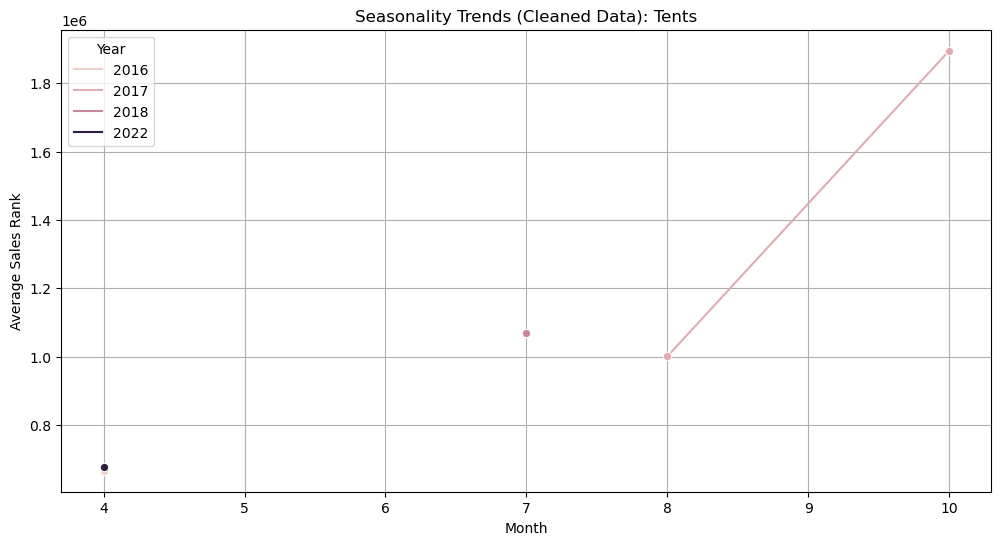

In [30]:
# Group and aggregate
sample_category = "Tents"
sample_data = seasonality_data[
    seasonality_data['Categories: Sub'] == sample_category
].groupby(['Tracking Year', 'Tracking Month'], as_index=False)['Sales Rank: Current'].mean()

# Plot sales rank trends
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=sample_data, 
    x='Tracking Month', 
    y='Sales Rank: Current', 
    hue='Tracking Year',
    marker='o'
)
plt.title(f"Seasonality Trends (Cleaned Data): {sample_category}")
plt.xlabel("Month")
plt.ylabel("Average Sales Rank")
plt.legend(title="Year")
plt.grid()
plt.show()


In [31]:
# Check data types
print(seasonality_data.dtypes)

# Inspect the problematic column for non-numeric entries
print(seasonality_data['New, 3rd Party FBA: Current'].unique())



Sales Rank: Current                   float64
Sales Rank: 30 days avg.              float64
Sales Rank: 90 days avg.              float64
Amazon: Lowest                        float64
New: Current                          float64
New, 3rd Party FBA: Current           float64
Tracking since                         object
Last Price Change                      object
Categories: Sub                        object
Categories: Root                       object
Tracking Date                  datetime64[ns]
Tracking Year                           int64
Tracking Month                          int64
dtype: object
[ 0.   25.42 14.66 16.99 16.97 27.97 23.99 19.99 25.48 21.99 23.61 26.
 20.89 24.53 10.99 13.99 17.99 12.99 15.49 29.99 39.99 24.54 49.89 21.14
 26.93 57.94 24.99]


In [32]:
seasonality_data = seasonality_data.sort_values('Tracking Date')

In [33]:
category_data = seasonality_data[seasonality_data['Categories: Root'] == 'Beauty & Personal Care']


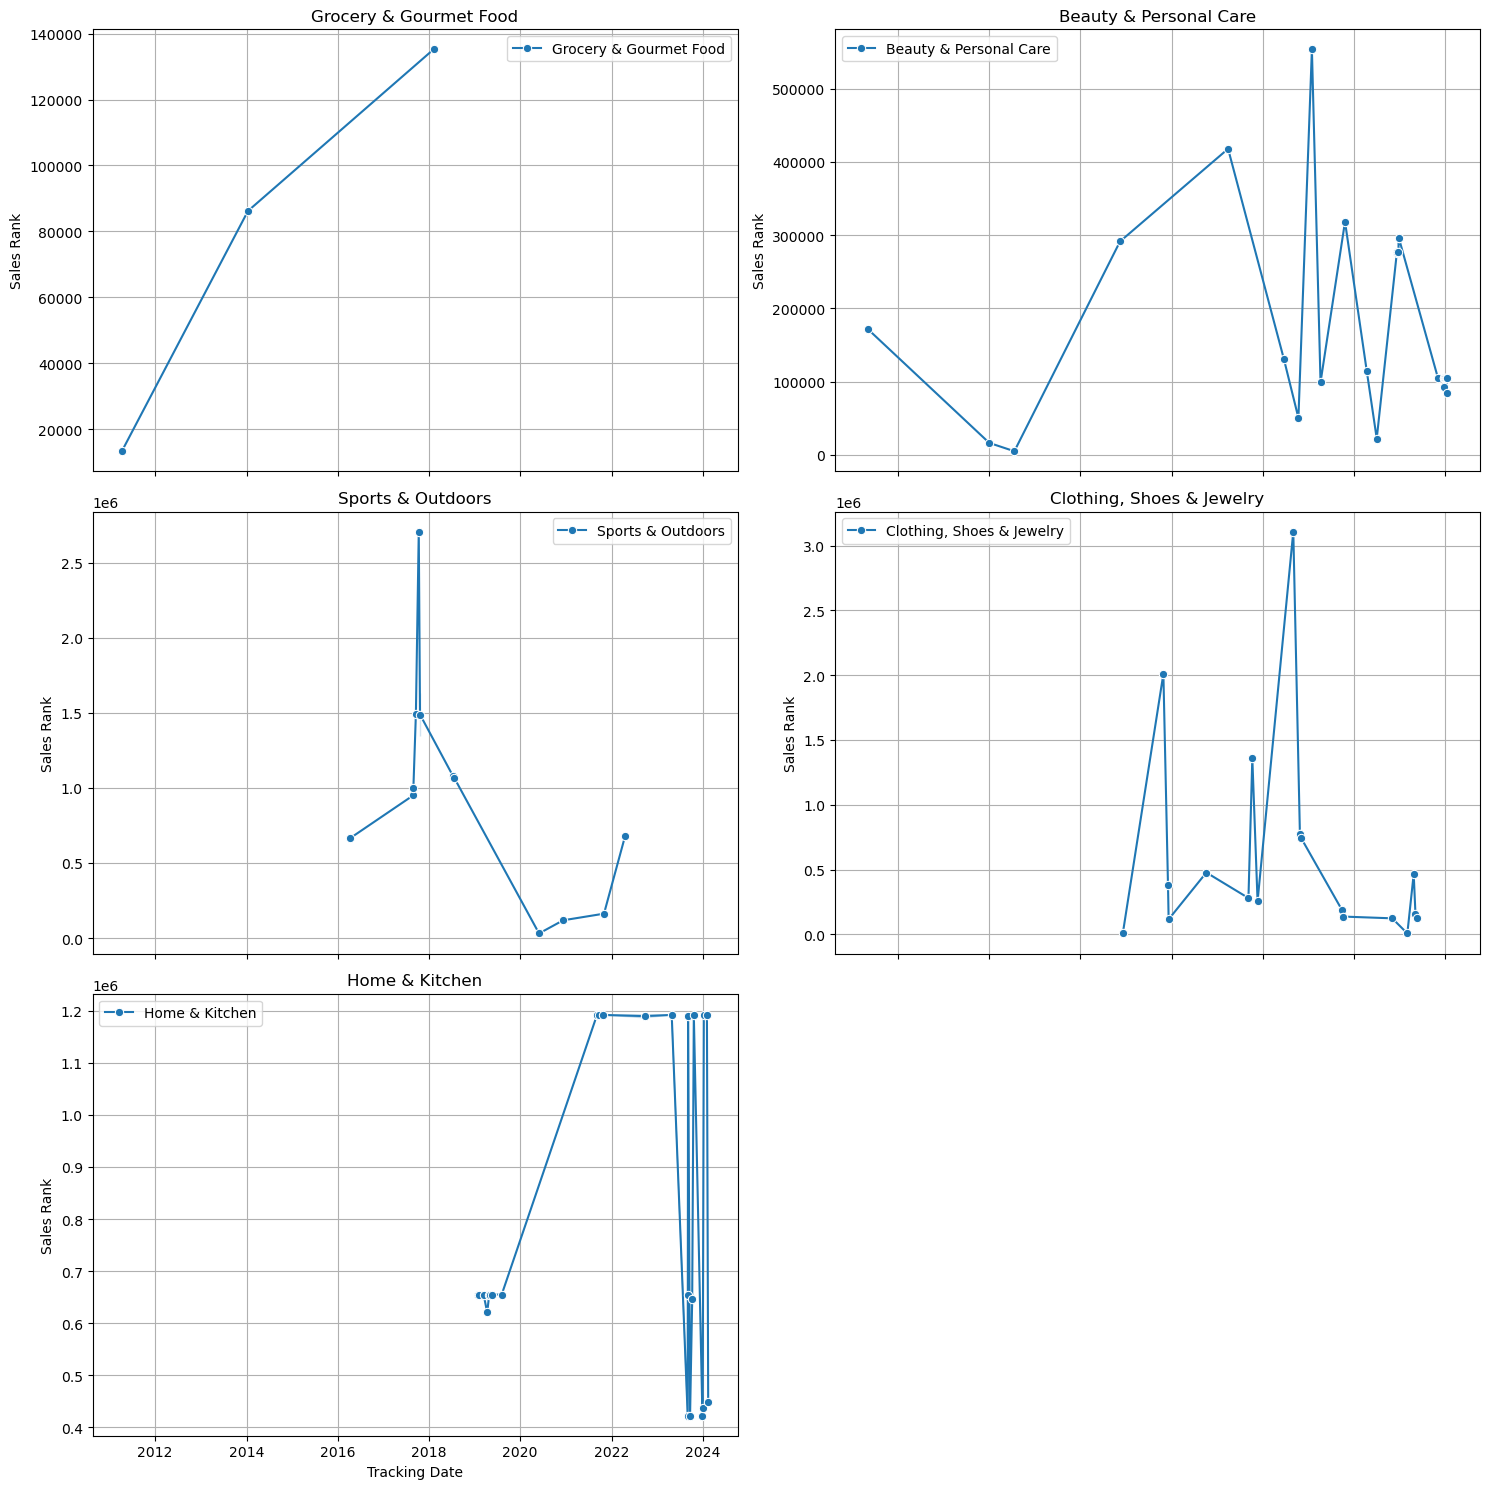

In [34]:
# Get unique root categories
root_categories = seasonality_data['Categories: Root'].unique()

# Set up the grid dimensions
n_categories = len(root_categories)
n_cols = 2
n_rows = (n_categories + n_cols - 1) // n_cols  # Calculate rows needed for 3 columns

# Create the figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), sharex=True, sharey=False)
axes = axes.flatten()  # Flatten axes for easier indexing

# Iterate over each root category and plot its trends
for i, root_category in enumerate(root_categories):
    # Filter data for the current root category
    category_data = seasonality_data[seasonality_data['Categories: Root'] == root_category]
    
    # Plot the trends
    sns.lineplot(
        data=category_data,
        x='Tracking Date',
        y='Sales Rank: Current',
        ax=axes[i],
        marker='o',
        label=root_category
    )
    
    # Set title and labels for the subplot
    axes[i].set_title(root_category)
    axes[i].set_xlabel('Tracking Date')
    axes[i].set_ylabel('Sales Rank')
    axes[i].grid(True)
    
# Remove empty subplots if the number of categories is not a multiple of 3
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

